In [10]:
from sklearn.svm import SVR
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

df = pd.read_csv('FB_stock.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/1/20,294.709991,301.489990,292.709991,295.440002,295.440002,17295900
1,9/2/20,298.880005,303.600006,293.049988,302.500000,302.500000,24341400
2,9/3/20,295.989990,297.600006,283.630005,291.119995,291.119995,32294100
3,9/4/20,287.250000,289.000000,271.140015,282.730011,282.730011,30333700
4,9/8/20,271.279999,279.299988,269.420013,271.160004,271.160004,24864000
...,...,...,...,...,...,...,...
247,8/25/21,365.600006,370.859985,365.399994,368.390015,368.390015,9684500
248,8/26/21,368.380005,369.440002,364.130005,364.380005,364.380005,7888700
249,8/27/21,365.100006,373.739990,364.079987,372.630005,372.630005,11214200
250,8/30/21,372.559998,381.489990,370.519989,380.660004,380.660004,13547300


In [11]:
df.shape

(252, 7)

In [12]:
actual_price = df.tail(1)
actual_price

,Date,Open,High,Low,Close,Adj Close,Volume
251,8/31/21,379.950012,382.76001,378.799988,379.380005,379.380005,12339400


In [14]:
df = df.head(len(df)-1)
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,9/1/20,294.709991,301.489990,292.709991,295.440002,295.440002,17295900
1,9/2/20,298.880005,303.600006,293.049988,302.500000,302.500000,24341400
2,9/3/20,295.989990,297.600006,283.630005,291.119995,291.119995,32294100
3,9/4/20,287.250000,289.000000,271.140015,282.730011,282.730011,30333700
4,9/8/20,271.279999,279.299988,269.420013,271.160004,271.160004,24864000
...,...,...,...,...,...,...,...
245,8/23/21,359.440002,365.690002,359.100006,363.350006,363.350006,10942000
246,8/24/21,363.660004,367.959991,361.839996,365.510010,365.510010,9235100
247,8/25/21,365.600006,370.859985,365.399994,368.390015,368.390015,9684500
248,8/26/21,368.380005,369.440002,364.130005,364.380005,364.380005,7888700


In [22]:
days = list()
adj_close_prices = list()

df_days = df.loc[:,'Date']
df_days

df_adj_close = df.loc[:, 'Adj Close']
df_adj_close

for day in df_days:
    days.append([int(day.split('/')[1])])
days

for adj_close_price in df_adj_close:
    adj_close_prices.append(float(adj_close_price))
    
adj_close_prices

[295.440002,
 302.5,
 291.119995,
 282.730011,
 271.160004,
 273.720001,
 268.089996,
 266.609985,
 266.149994,
 272.420013,
 263.519989,
 254.820007,
 252.529999,
 248.149994,
 254.75,
 249.020004,
 249.529999,
 254.820007,
 256.820007,
 261.790009,
 261.899994,
 266.630005,
 259.940002,
 264.649994,
 258.660004,
 258.119995,
 263.76001,
 264.450012,
 275.75,
 276.140015,
 271.820007,
 266.720001,
 265.929993,
 261.399994,
 267.559998,
 278.730011,
 278.119995,
 284.790009,
 277.109985,
 283.290009,
 267.670013,
 280.829987,
 263.109985,
 261.359985,
 265.299988,
 287.380005,
 294.679993,
 293.410004,
 278.769989,
 272.429993,
 276.480011,
 275.079987,
 276.950012,
 278.959991,
 275.0,
 271.970001,
 272.940002,
 269.700012,
 268.429993,
 276.920013,
 275.589996,
 277.809998,
 276.970001,
 286.549988,
 287.519989,
 281.850006,
 279.700012,
 285.579987,
 283.399994,
 277.920013,
 277.119995,
 273.549988,
 274.190002,
 275.549988,
 275.670013,
 274.480011,
 276.399994,
 272.790009,
 267.

In [24]:
print(days)
print(adj_close_prices)

[[1], [2], [3], [4], [8], [9], [10], [11], [14], [15], [16], [17], [18], [21], [22], [23], [24], [25], [28], [29], [30], [1], [2], [5], [6], [7], [8], [9], [12], [13], [14], [15], [16], [19], [20], [21], [22], [23], [26], [27], [28], [29], [30], [2], [3], [4], [5], [6], [9], [10], [11], [12], [13], [16], [17], [18], [19], [20], [23], [24], [25], [27], [30], [1], [2], [3], [4], [7], [8], [9], [10], [11], [14], [15], [16], [17], [18], [21], [22], [23], [24], [28], [29], [30], [31], [4], [5], [6], [7], [8], [11], [12], [13], [14], [15], [19], [20], [21], [22], [25], [26], [27], [28], [29], [1], [2], [3], [4], [5], [8], [9], [10], [11], [12], [16], [17], [18], [19], [22], [23], [24], [25], [26], [1], [2], [3], [4], [5], [8], [9], [10], [11], [12], [15], [16], [17], [18], [19], [22], [23], [24], [25], [26], [29], [30], [31], [1], [5], [6], [7], [8], [9], [12], [13], [14], [15], [16], [19], [20], [21], [22], [23], [26], [27], [28], [29], [30], [3], [4], [5], [6], [7], [10], [11], [12], [13],

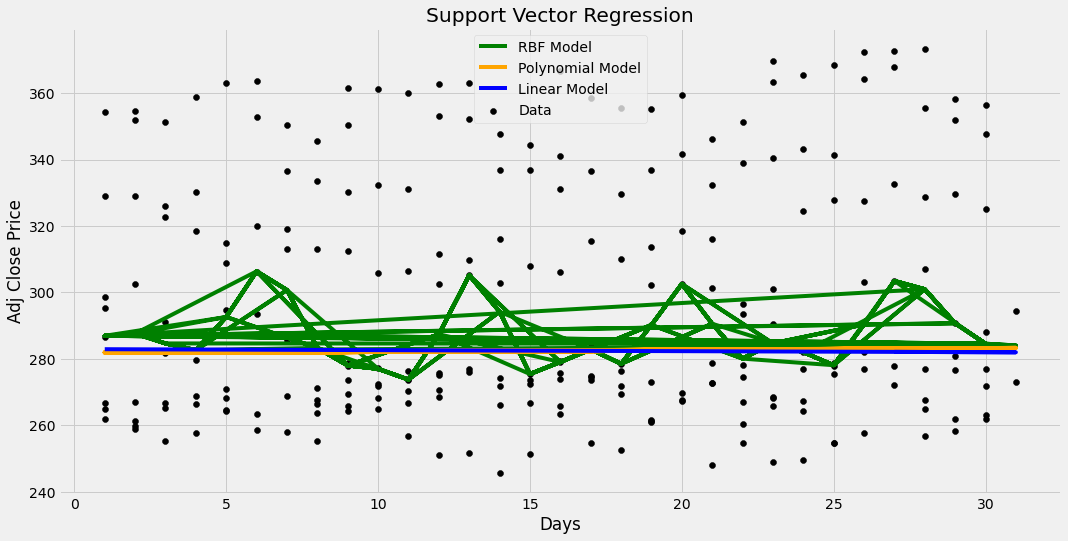

In [31]:
#Create and train an SVR model using a linear kernel
lin_svr = SVR(kernel='linear', C=1000.0)
lin_svr.fit(days,adj_close_prices)
#Create and train an SVR model using a polynomial kernel
poly_svr = SVR(kernel='poly', C=1000.0, degree=2)
poly_svr.fit(days, adj_close_prices)
#Create and train an SVR model using a RBF kernel
rbf_svr = SVR(kernel='rbf', C=1000.0, gamma=0.15)
rbf_svr.fit(days, adj_close_prices)

#Plot the models on a graph to see which has the best fit
plt.figure(figsize=(16,8))
plt.scatter(days, adj_close_prices, color = 'black', label='Data')
plt.plot(days, rbf_svr.predict(days), color = 'green', label='RBF Model')
plt.plot(days, poly_svr.predict(days), color = 'orange', label='Polynomial Model')
plt.plot(days, lin_svr.predict(days), color = 'blue', label='Linear Model')
plt.xlabel('Days')
plt.ylabel('Adj Close Price')
plt.title('Support Vector Regression')
plt.legend()
plt.show()

In [33]:
day = [[30]]
print('The RBF SVR predicted price:',rbf_svr.predict(day))
print('The linear SVR predicted price',lin_svr.predict(day))
print('The polynomial SVR predicted price',poly_svr.predict(day))

The RBF SVR predicted price: [284.5763782]
The linear SVR predicted price [282.02634746]
The polynomial SVR predicted price [283.22518936]
